In [ ]:
import carbonbench

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
targets = ['GPP_NT_VUT_USTAR50', 'RECO_NT_VUT_USTAR50', 'NEE_VUT_USTAR50']
include_qc = True
df = carbonbench.load_targets(targets, include_qc)
df

,date,site,lat,lon,IGBP,Koppen,Koppen_short,GPP_NT_VUT_USTAR50,RECO_NT_VUT_USTAR50,NEE_VUT_USTAR50,NEE_VUT_USTAR50_QC
0,2009-01-01,FLX_AR-SLu,-33.464800,-66.459800,MF,B,BSh,8.989840,2.957700,-6.032130,0.0
1,2009-01-02,FLX_AR-SLu,-33.464800,-66.459800,MF,B,BSh,8.912250,2.977330,-5.934920,0.0
2,2009-01-03,FLX_AR-SLu,-33.464800,-66.459800,MF,B,BSh,9.356500,3.330460,-6.026040,0.0
3,2009-01-04,FLX_AR-SLu,-33.464800,-66.459800,MF,B,BSh,9.826600,3.794460,-6.032130,0.0
4,2009-01-05,FLX_AR-SLu,-33.464800,-66.459800,MF,B,BSh,9.727970,3.793040,-5.934920,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1435909,2023-12-27,JPX_JP-Tmd,42.735911,141.523147,DBF,D,Dfb,1.013866,0.617556,-0.396310,0.0
1435910,2023-12-28,JPX_JP-Tmd,42.735911,141.523147,DBF,D,Dfb,0.738017,0.734304,-0.003712,0.0
1435911,2023-12-29,JPX_JP-Tmd,42.735911,141.523147,DBF,D,Dfb,0.744890,0.765398,0.020508,0.0
1435912,2023-12-30,JPX_JP-Tmd,42.735911,141.523147,DBF,D,Dfb,0.470808,0.907578,0.436770,0.0


In [18]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

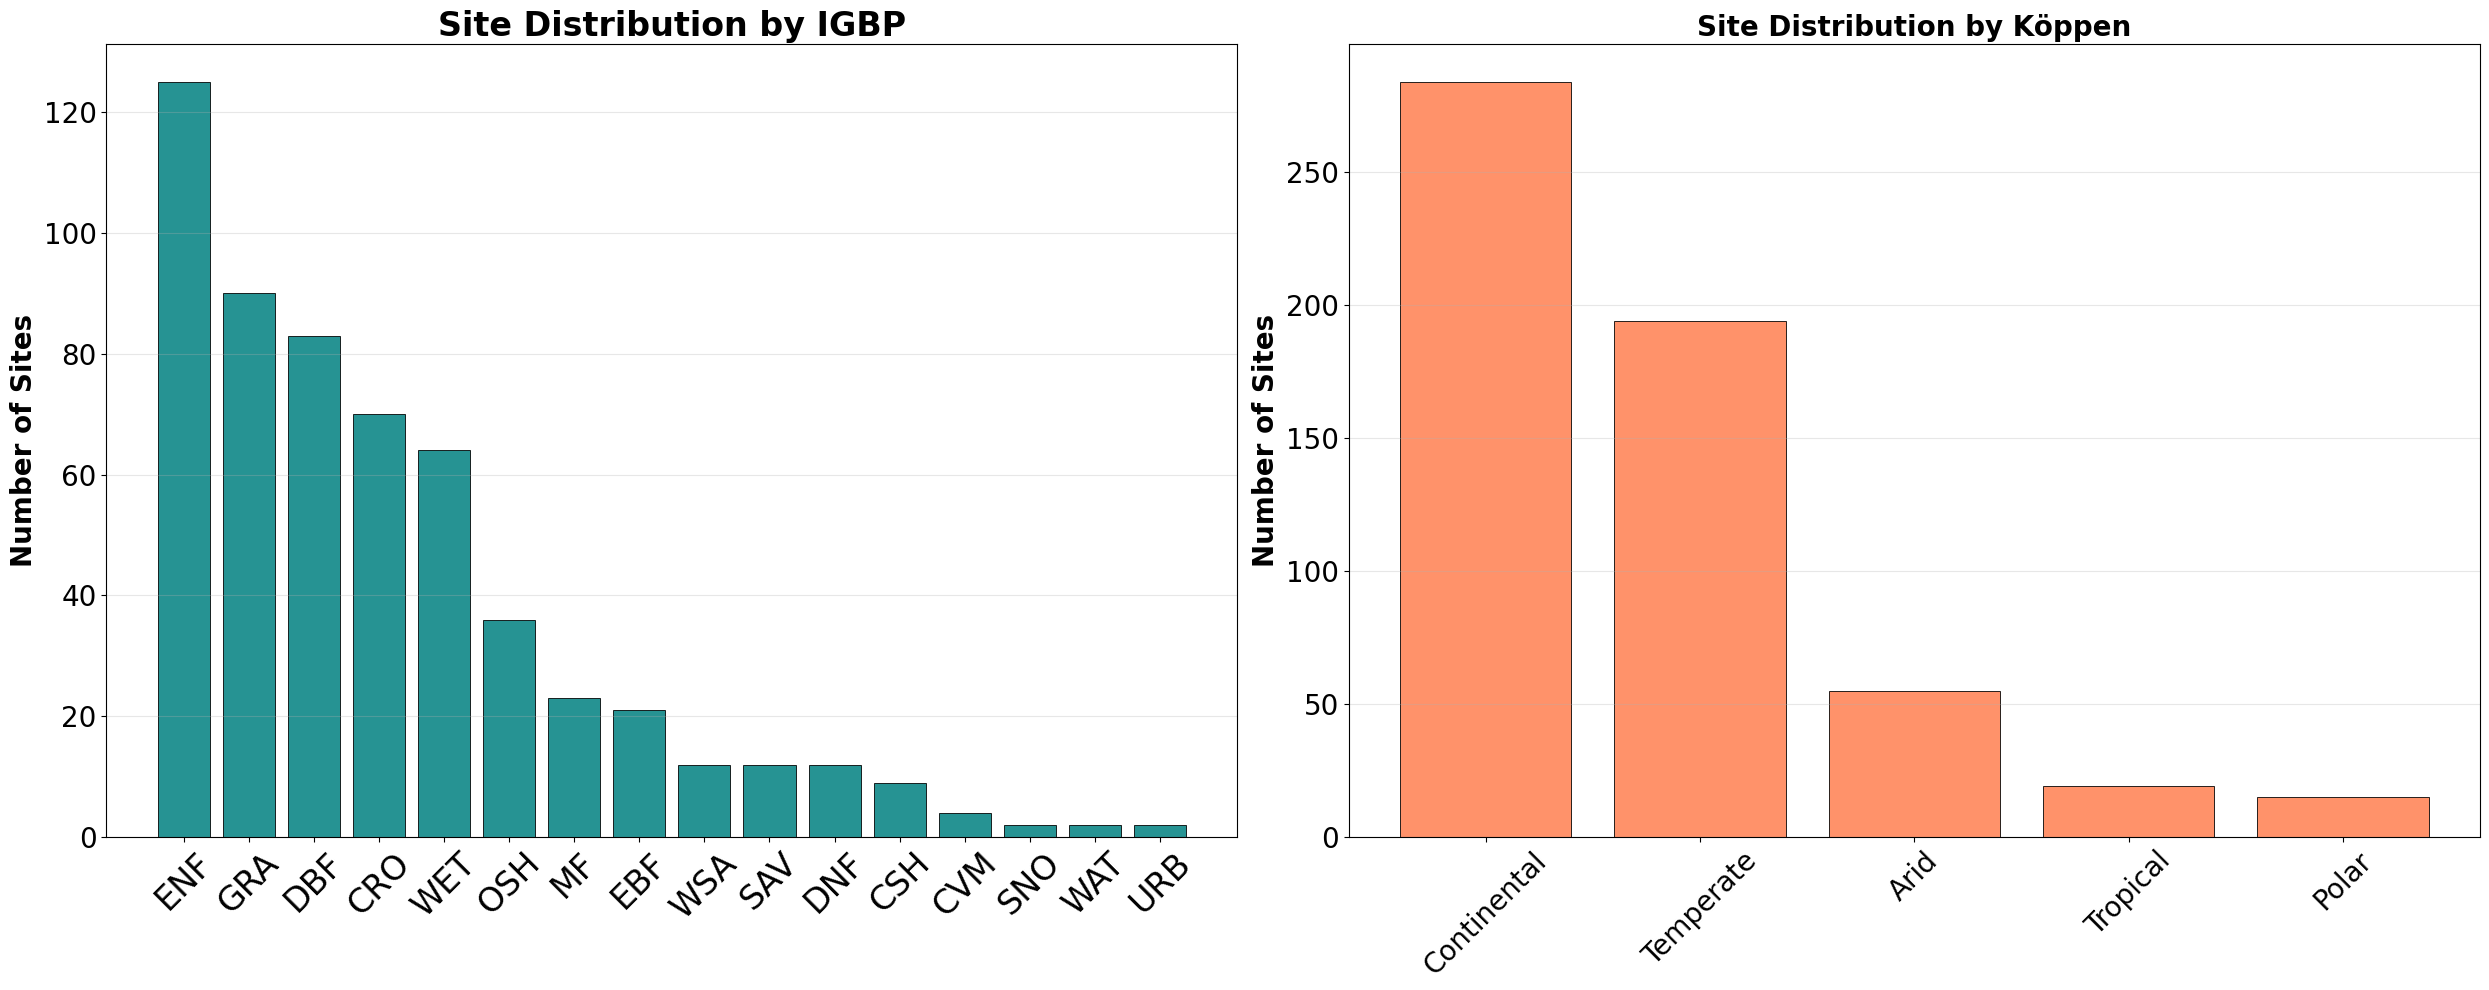

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
    
koppen_map = {
    'A': 'Tropical',
    'B': 'Arid',
    'C': 'Temperate',
    'D': 'Continental',
    'E': 'Polar'
}
igbp_counts = df.groupby('IGBP')['site'].nunique().sort_values(ascending=False)
axes[0].bar(range(len(igbp_counts)), igbp_counts.values, color='teal',
            alpha=0.85, edgecolor='black', linewidth=0.7)
#axes[0].set_xlabel('IGBP Class', fontsize=20, fontweight='bold')
axes[0].set_ylabel('Number of Sites', fontsize=20, fontweight='bold')
axes[0].set_title(f'Site Distribution by IGBP', 
                 fontsize=24, fontweight='bold')
axes[0].set_xticks(range(len(igbp_counts)))
axes[0].set_xticklabels(igbp_counts.index, rotation=45, ha='center', fontsize=24)
axes[0].grid(axis='y', alpha=0.3)

# Koppen distribution
koppen_counts = df.groupby('Koppen')['site'].nunique().sort_values(ascending=False)
koppen_counts.index = koppen_counts.index.map(lambda x: koppen_map.get(x[0], x))
axes[1].bar(range(len(koppen_counts)), koppen_counts.values,
            alpha=0.85, edgecolor='black', linewidth=0.7, color='coral')
#axes[1].set_xlabel('Köppen Class', fontsize=20, fontweight='bold')
axes[1].set_ylabel('Number of Sites', fontsize=20, fontweight='bold')
axes[1].set_title(f'Site Distribution by Köppen', 
                 fontsize=20, fontweight='bold')
axes[1].set_xticks(range(len(koppen_counts)))
axes[1].set_xticklabels(koppen_counts.index, rotation=45, ha='center', fontsize=20)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('./figs/site_distributions.png', bbox_inches='tight')
plt.show()

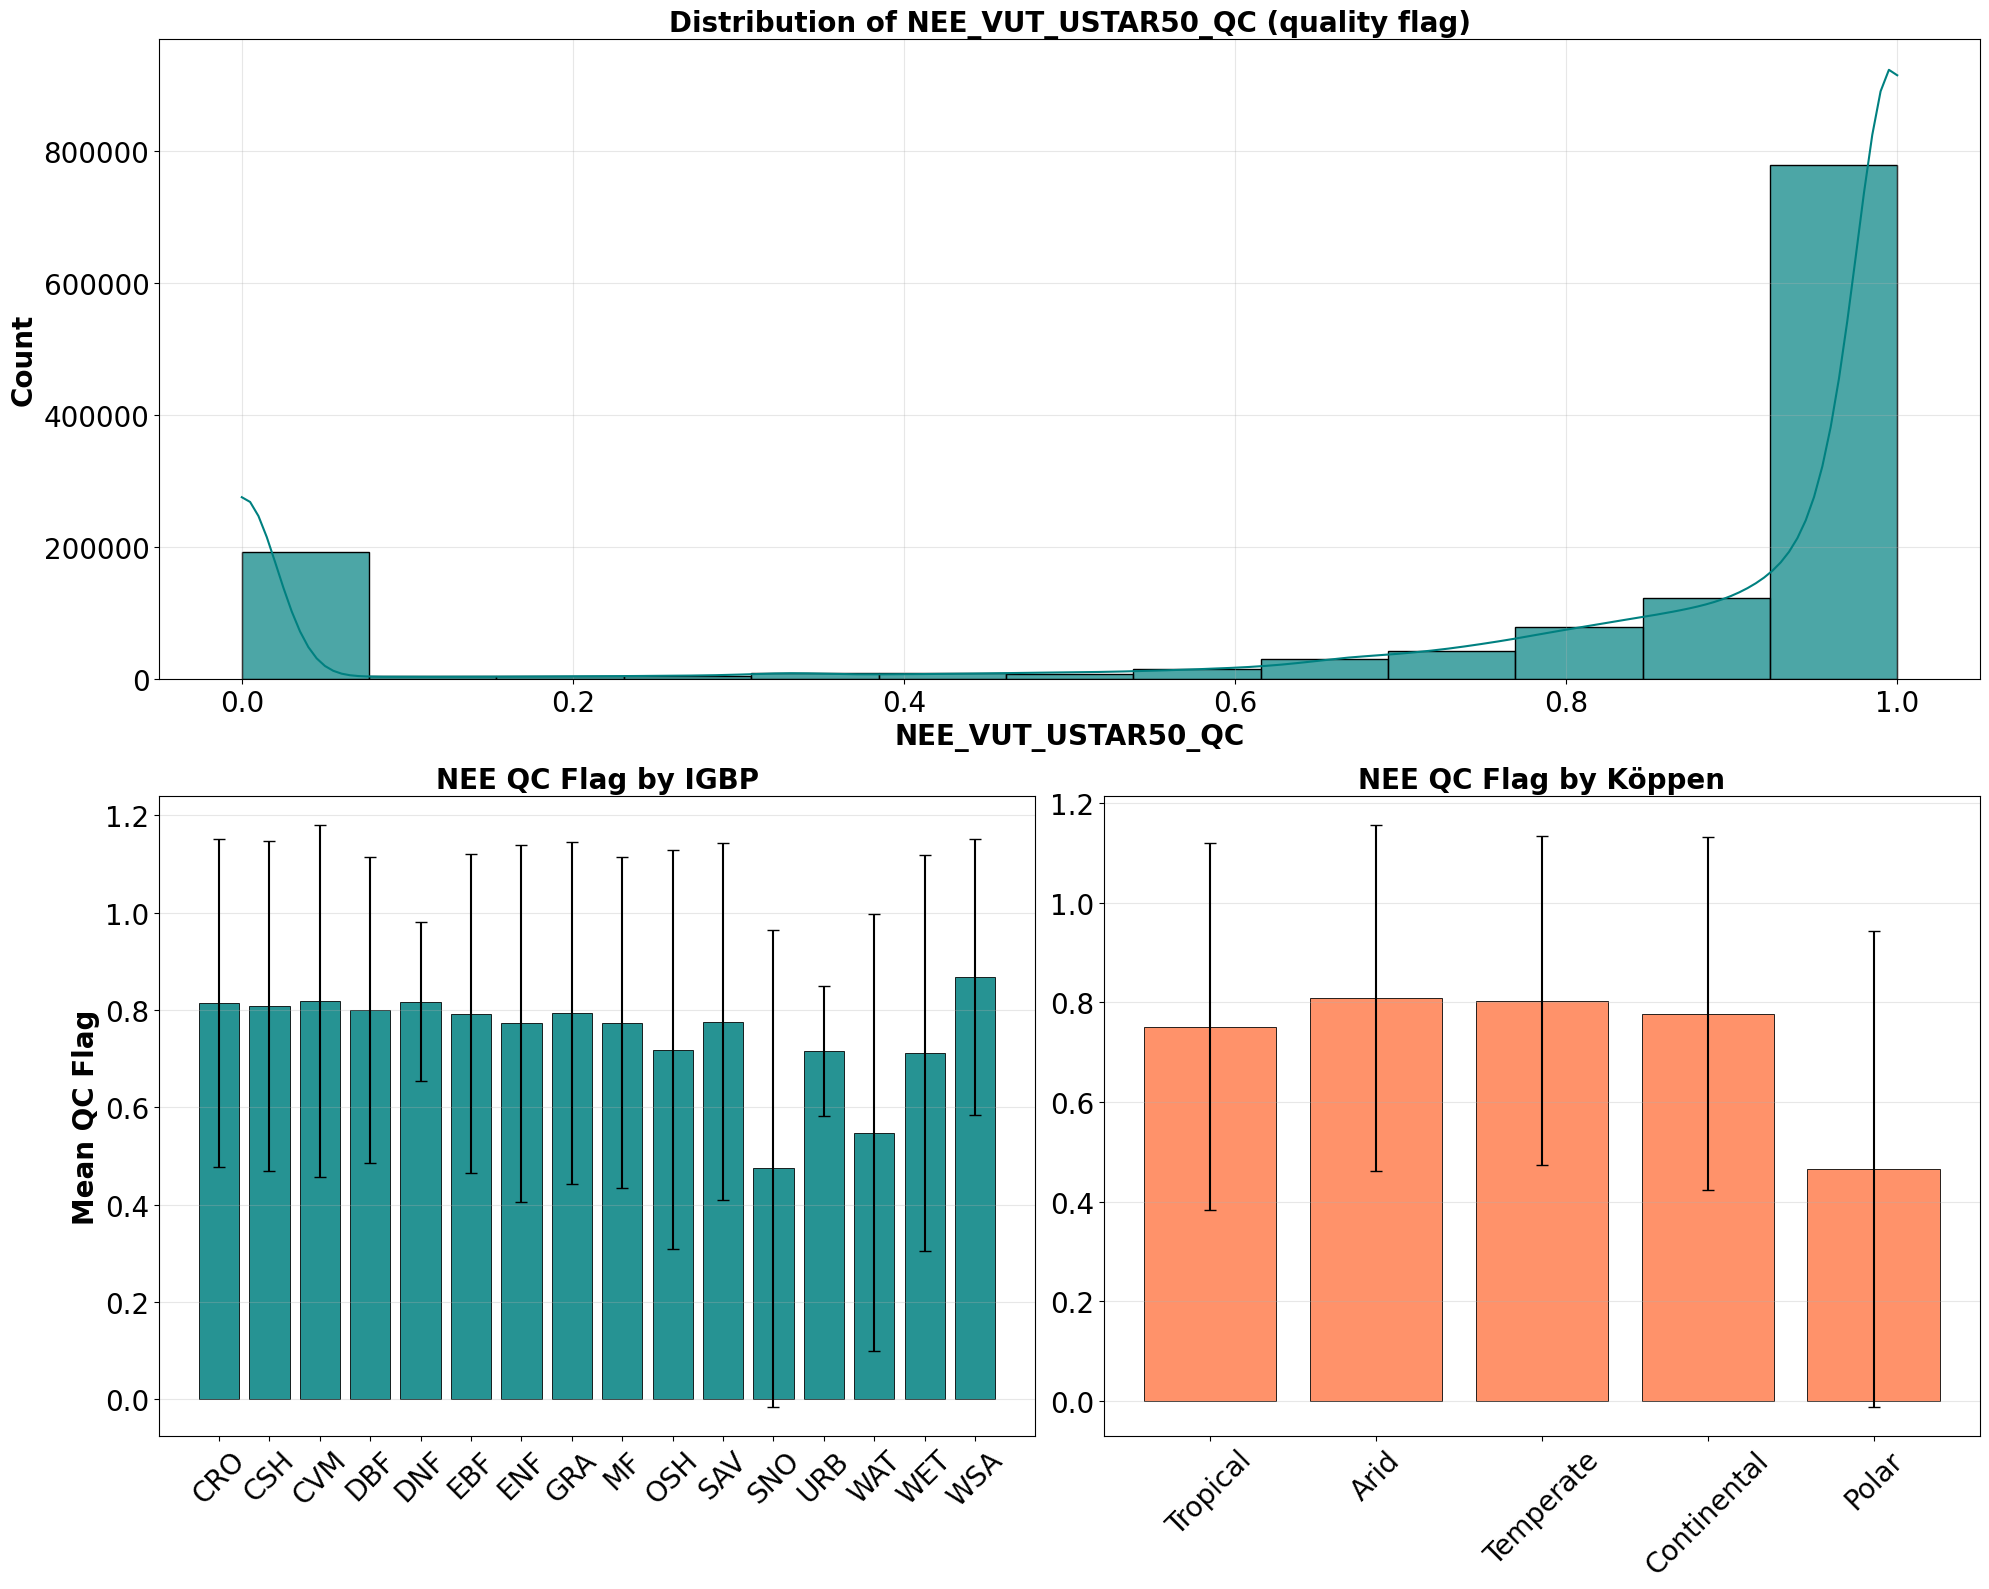

In [ ]:
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

ax_kde = fig.add_subplot(gs[0, :])
sns.histplot(df['NEE_VUT_USTAR50_QC'], alpha=0.7, color='teal', log=False, bins=13,
             edgecolor='black', kde=True, ax=ax_kde)
ax_kde.set_xlabel('NEE_VUT_USTAR50_QC', fontsize=20, fontweight='bold')
ax_kde.set_ylabel('Count', fontsize=20, fontweight='bold')
ax_kde.set_title(f'Distribution of NEE_VUT_USTAR50_QC (quality flag)', 
                 fontsize=20, fontweight='bold')
ax_kde.grid(alpha=0.3)

ax_igbp = fig.add_subplot(gs[1, 0])
igbp_qc = df.groupby('IGBP')['NEE_VUT_USTAR50_QC'].mean().sort_index()
igbp_std = df.groupby('IGBP')['NEE_VUT_USTAR50_QC'].std().sort_index()
ax_igbp.bar(range(len(igbp_qc)), igbp_qc.values, yerr=igbp_std.values, color='teal',
            alpha=0.85, edgecolor='black', linewidth=0.7, capsize=4)
#ax_igbp.set_xlabel('IGBP Class', fontsize=20, fontweight='bold')
ax_igbp.set_ylabel('Mean QC Flag', fontsize=20, fontweight='bold')
ax_igbp.set_title('NEE QC Flag by IGBP', fontsize=20, fontweight='bold')
ax_igbp.set_xticks(range(len(igbp_qc)))
ax_igbp.set_xticklabels(igbp_qc.index, rotation=45, ha='center', fontsize=20)
ax_igbp.grid(axis='y', alpha=0.3)

ax_koppen = fig.add_subplot(gs[1, 1])
koppen_map = {'A': 'Tropical', 'B': 'Arid', 'C': 'Temperate', 
              'D': 'Continental', 'E': 'Polar'}
koppen_qc = df.groupby('Koppen')['NEE_VUT_USTAR50_QC'].mean().sort_index()
koppen_std = df.groupby('Koppen')['NEE_VUT_USTAR50_QC'].std().sort_index()
koppen_qc.index = koppen_qc.index.map(lambda x: koppen_map.get(x[0], x))
koppen_std.index = koppen_std.index.map(lambda x: koppen_map.get(x[0], x))
ax_koppen.bar(range(len(koppen_qc)), koppen_qc.values, yerr=koppen_std.values,
              alpha=0.85, edgecolor='black', linewidth=0.7, color='coral', capsize=4)
#ax_koppen.set_xlabel('Köppen Class', fontsize=20, fontweight='bold')
ax_koppen.set_title('NEE QC Flag by Köppen', fontsize=20, fontweight='bold')
ax_koppen.set_xticks(range(len(koppen_qc)))
ax_koppen.set_xticklabels(koppen_qc.index, rotation=45, ha='center', fontsize=20)
ax_koppen.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('./figs/qc_combined.png', bbox_inches='tight')
plt.show()

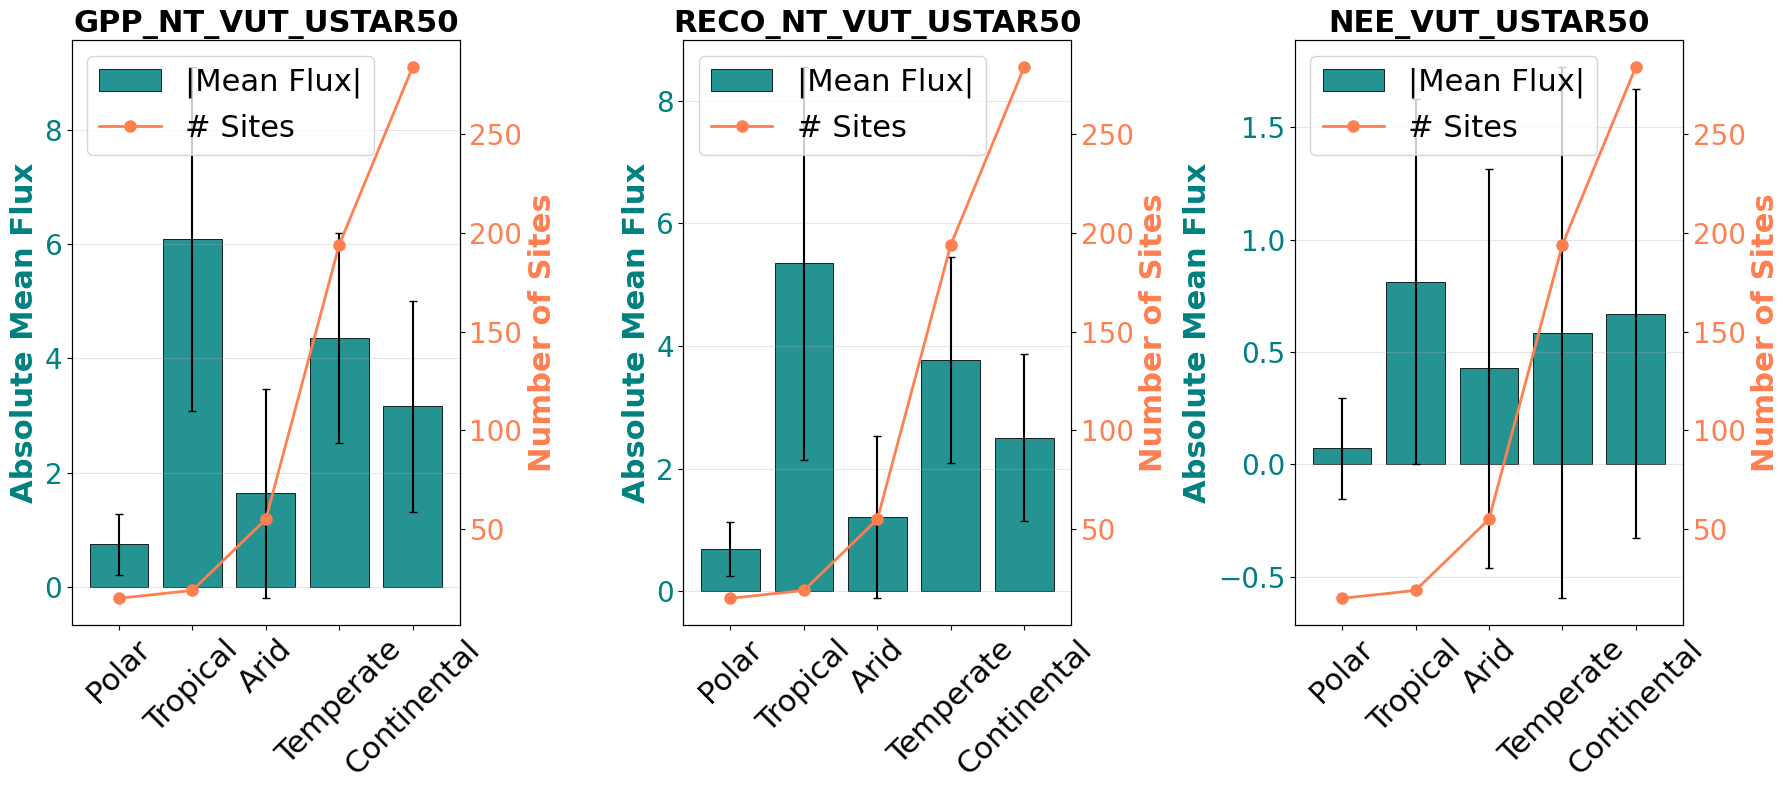

In [ ]:
flux_vars = ['GPP_NT_VUT_USTAR50', 'RECO_NT_VUT_USTAR50', 'NEE_VUT_USTAR50']
    
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

for i, var in enumerate(flux_vars):
    ax = axes[i]

    koppen_stats = df.groupby(['Koppen', 'site'])[var].mean().groupby('Koppen').agg(['mean', 'std'])
    koppen_counts = df.groupby('Koppen')['site'].nunique()
    
    combined = pd.DataFrame({
        'magnitude': koppen_stats['mean'].abs(),
        'std': koppen_stats['std'],
        'n_sites': koppen_counts
    }).sort_values('n_sites')


    ax2 = ax.twinx()

    x = np.arange(len(combined))
    bars = ax.bar(x, combined['magnitude'].values, yerr=combined['std'].values,
                  alpha=0.85, edgecolor='black', linewidth=0.7, 
                  capsize=3, label='|Mean Flux|', color='teal')
    line = ax2.plot(x, combined['n_sites'].values, c='coral', marker='o', 
                   linewidth=2, markersize=8, label='# Sites')

    #ax.set_xlabel('Köppen Class', fontsize=20, fontweight='bold')
    ax.set_ylabel('Absolute Mean Flux', fontsize=22, fontweight='bold', color='teal')
    ax2.set_ylabel('Number of Sites', fontsize=22, fontweight='bold', color='coral')
    ax.set_title(var, 
                fontsize=22, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(combined.index.map(lambda x: koppen_map.get(x[0], x)), rotation=45, ha='center', fontsize=22)
    ax.grid(axis='y', alpha=0.3)
    ax.tick_params(axis='y', labelcolor='teal')
    ax2.tick_params(axis='y', labelcolor='coral')

    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend([bars, line[0]], ['|Mean Flux|', '# Sites'], 
             loc='upper left', fontsize=22)

plt.tight_layout()
plt.savefig('./plots/flux_magnitude_vs_sites.png', bbox_inches='tight')
plt.show()

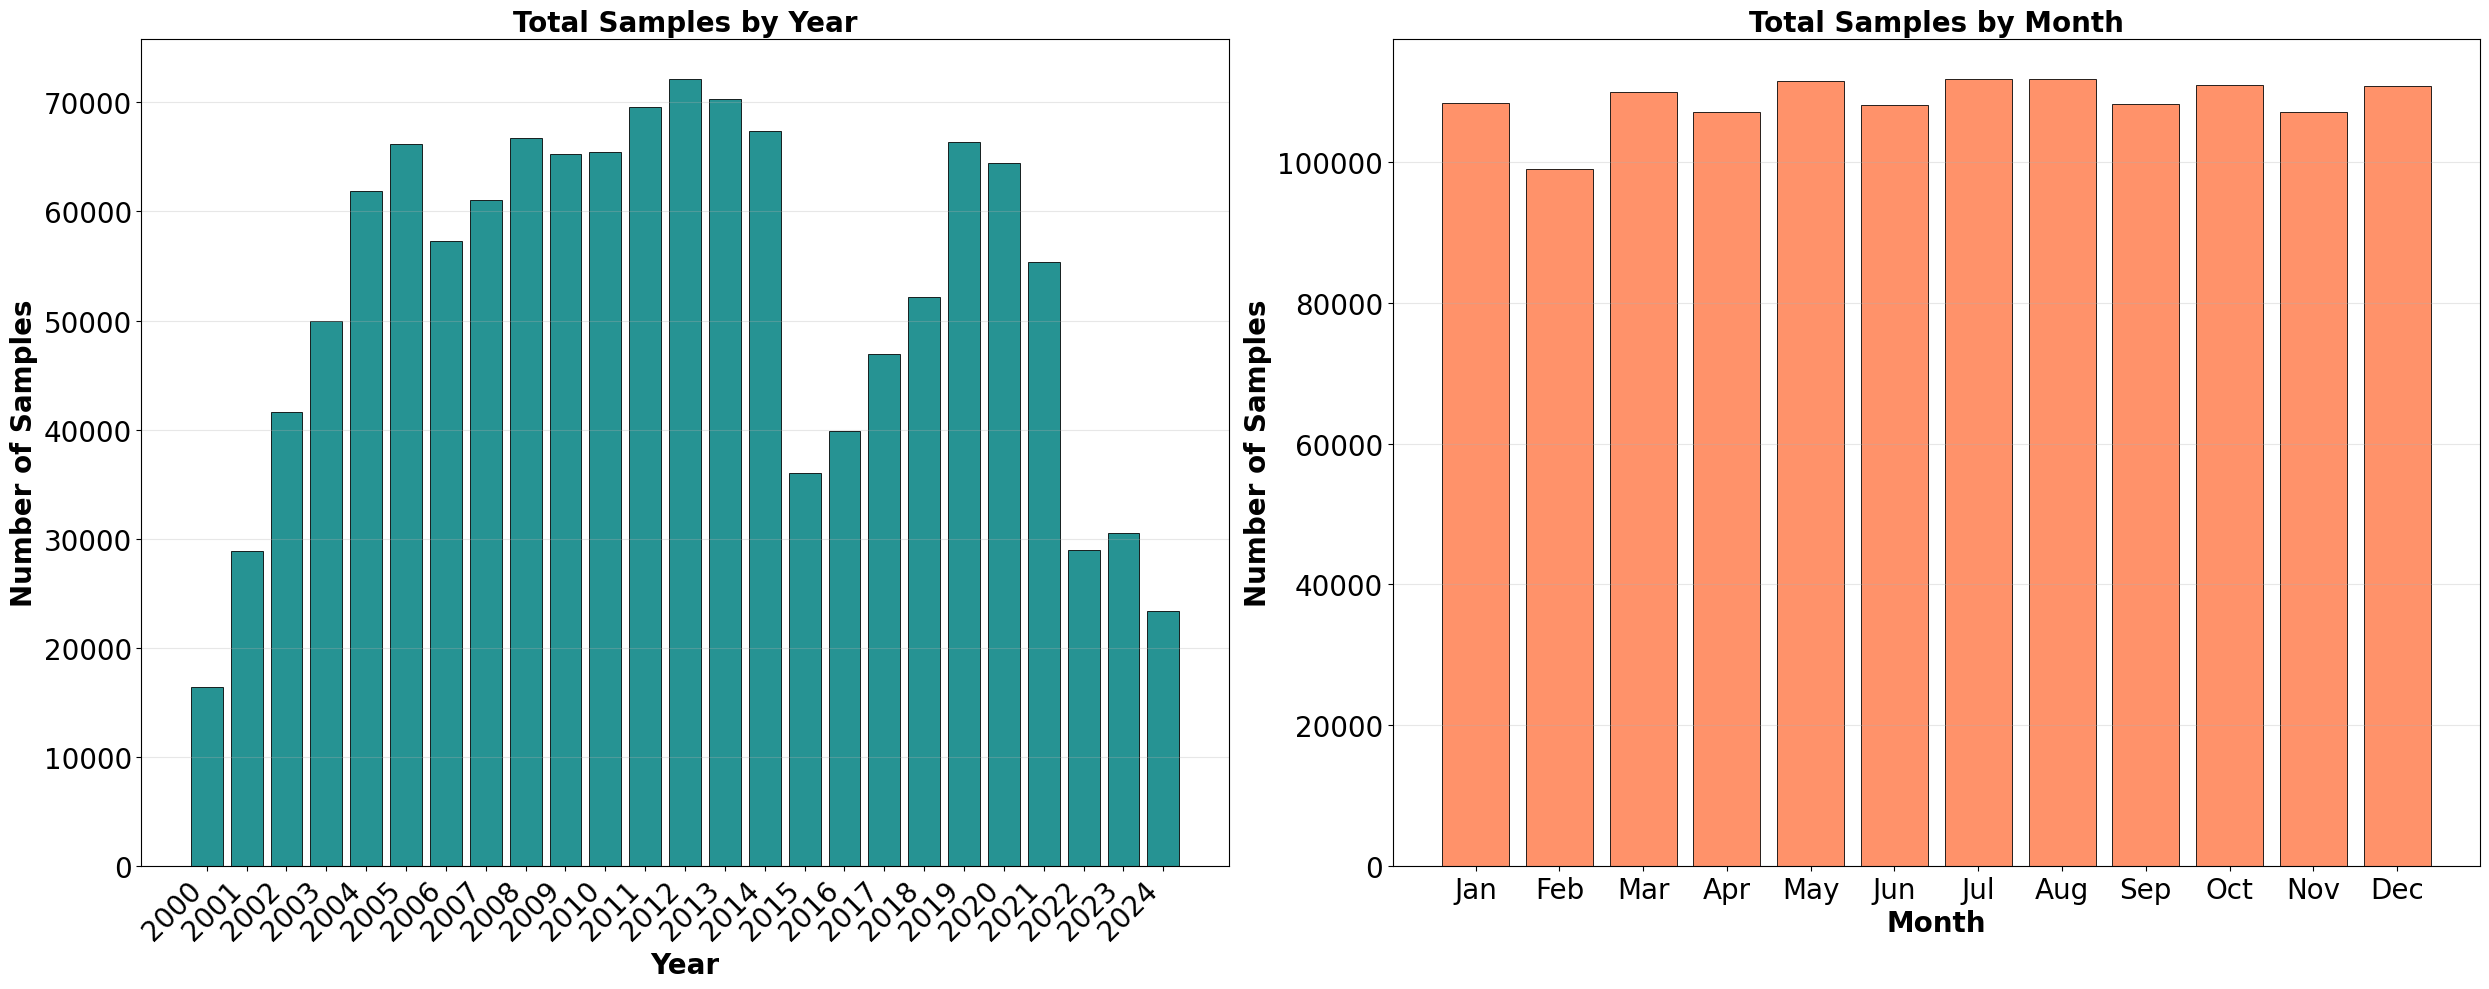

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

yearly_counts = df.groupby(df['date'].dt.year).size().sort_index()
axes[0].bar(range(len(yearly_counts)), yearly_counts.values, 
            alpha=0.85, edgecolor='black', linewidth=0.7, color='teal')
axes[0].set_xlabel('Year', fontsize=20, fontweight='bold')
axes[0].set_ylabel('Number of Samples', fontsize=20, fontweight='bold')
axes[0].set_title(f'Total Samples by Year', 
                  fontsize=20, fontweight='bold')
axes[0].set_xticks(range(len(yearly_counts)))
axes[0].set_xticklabels(yearly_counts.index, rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

monthly_counts = df.groupby(df['date'].dt.month).size().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1].bar(range(len(monthly_counts)), monthly_counts.values, 
            alpha=0.85, edgecolor='black', linewidth=0.7, color='coral')
axes[1].set_xlabel('Month', fontsize=20, fontweight='bold')
axes[1].set_ylabel('Number of Samples', fontsize=20, fontweight='bold')
axes[1].set_title('Total Samples by Month', fontsize=20, fontweight='bold')
axes[1].set_xticks(range(len(monthly_counts)))
axes[1].set_xticklabels(month_names, rotation=0, ha='center')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('./plots/samples_by_time.png', bbox_inches='tight')
plt.show()